|students:|
|-----------------|
|  Amit Fallach 318510070|
|Karin Lev Sofi 206682577|
|Ronen Kurman 315810176|
|Linoy Madalsy 206073124|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

Called Data Prime from GitHub

In [2]:
url = 'https://raw.githubusercontent.com/amitfallach/disney-plus-shows/main/disney_plus_shows.csv'
disney_df= pd.read_csv(url)
disney_df = disney_df.copy() 
disney_df.tail()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,NaN,NaN,5.5,"2,339"
991,tt2948356,Zootopia,"In a city of anthropomorphic animals, a rookie...",movie,PG,2016,04 Mar 2016,"November 12, 2019",108 min,"Animation, Adventure, Comedy, Crime, Family, M...","Byron Howard, Rich Moore, Jared Bush(co-director)","Byron Howard (story by), Rich Moore (story by)...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",English,USA,Won 1 Oscar. Another 46 wins & 71 nominations.,78.0,8.0,"410,437"


### Wrangling data , missing values and fix columns.

##### We will cut all the rows that have more than 8 missing values

In [3]:
disney_df = disney_df[disney_df.isnull().sum(axis=1) < 8].reset_index(drop=True)
disney_df.shape

(875, 19)

##### we look at the types of columns and how much NAN types each have to see if we want to change them

In [4]:
disney_df.dtypes

imdb_id         object
title           object
plot            object
type            object
rated           object
year            object
released_at     object
added_at        object
runtime         object
genre           object
director        object
writer          object
actors          object
language        object
country         object
awards          object
metascore      float64
imdb_rating    float64
imdb_votes      object
dtype: object

In [5]:
disney_df.isnull().sum().sort_values()

imdb_id          0
title            0
type             0
added_at         0
year             0
imdb_rating      2
imdb_votes       2
genre            3
actors          15
country         15
released_at     15
plot            18
language        18
runtime         42
rated          133
writer         135
director       189
awards         319
metascore      583
dtype: int64

##### We like to make the "Runtime"  column to an integer so that we can compare and use its values later, and we will add the measurement units to the "Runtime" column name.

##### According to the data frame we can be noted that the "Runtime" column describes the length of the episode / movie , so We fill the NAN values in the average time per episode and per movie by the DF.

In [6]:
pd.options.mode.chained_assignment = None
disney_df['runtime'] = disney_df['runtime'].str.replace('min', '')
disney_df['runtime'] = disney_df['runtime'].str.replace('1 h', '')
disney_df = disney_df.rename(columns= {'runtime':'runtime per min'})

temp_series = disney_df[disney_df['type']=="series"]
temp_movie = disney_df[disney_df['type']=="movie"]

#we fill the NAN values with 0 so we can convert the column to intiger and make average

temp_series['runtime per min'] = temp_series['runtime per min'].fillna("0")
temp_movie['runtime per min'] = temp_movie['runtime per min'].fillna("0")
temp_series = temp_series.astype({"runtime per min":int})
temp_movie = temp_movie.astype({"runtime per min":int})

#we replace the 0 value by the average.

temp_series['runtime per min'] = temp_series['runtime per min'].replace(0,(temp_series['runtime per min'].sum()/temp_series['runtime per min'].count()))
temp_movie['runtime per min'] = temp_movie['runtime per min'].replace(0,(temp_movie['runtime per min'].sum()/temp_movie['runtime per min'].count()))

disney_df = pd.concat([temp_series,temp_movie])
disney_df = disney_df.astype({"runtime per min":int})
disney_df = disney_df.reset_index(drop = True)

##### We like to make the "imdb_votes" column to an integer and delete the NAN values from "imdb_rating" so that we can compare and use its values later.

##### There are 2 rows that have NAN values in the "imdb_rating" and "imdb_votes" columns, we will delete them because they have a lot of NAN values .

In [7]:
disney_df = disney_df[disney_df["imdb_rating"].notna()]
disney_df["imdb_votes"] = disney_df["imdb_votes"].str.replace(',', '')
disney_df = disney_df.astype({"imdb_votes":int}).reset_index(drop = True)
#872 rows

##### convert the columns 'released_at' and "added_at" to date time.

In [8]:
disney_df['released_at'] = pd.to_datetime(disney_df['released_at'])
disney_df['added_at'] = pd.to_datetime(disney_df['added_at'])

##### The "genre" column has 3 NAN values and in that rows there are many more NAN values so we drop these 3 rows.

In [9]:
disney_df = disney_df.dropna(subset = ["genre"]).reset_index(drop = True)

##### In the "language" column we fill the NAN values with "English" becuse it defined as the language of Disney and the Disney Channel [link to the data source](https://he.wikipedia.org/wiki/%D7%A2%D7%A8%D7%95%D7%A5_%D7%93%D7%99%D7%A1%D7%A0%D7%99)

In [10]:
disney_df['language'].fillna("English",inplace = True)

##### We change the NAN values in the country column to "USA" because Disney is an American company and most of its series are made in USA. [link to the data source](https://he.wikipedia.org/wiki/%D7%A2%D7%A8%D7%95%D7%A5_%D7%93%D7%99%D7%A1%D7%A0%D7%99)

In [11]:
disney_df['country'].fillna("USA",inplace = True)

##### The column "rated" describes the content classification by age and has a lot of NAN values, we could not choose for each value specific to which classification to associate it so we chose to classify the NAN values in this column as suitable for all ages  [link to the data source](https://en.wikipedia.org/wiki/Motion_Picture_Association#Film_rating_system)

In [12]:
disney_df['rated'].fillna("G",inplace = True)

##### In our data frame the column "year" represents for serieses the range in which they broadcast, we will split the column "year" to columns 'aired_until_year' and 'broadcast_from_year' so that we can make a prediction later using the broadcast time.

In [13]:
#loop that split the column year to 2 colmuns
for i in disney_df['year']:
    disney_df['broadcast_from_year'] = disney_df['year'].str[0:4]
    disney_df['aired_until_year'] = disney_df['year'].str[5:9]

#convert the colmuns to datetime
disney_df['broadcast_from_year'] = pd.to_datetime(disney_df.broadcast_from_year)
disney_df['aired_until_year'] = pd.to_datetime(disney_df.aired_until_year)

#represent the year
disney_df['broadcast_from_year'] = pd.DatetimeIndex(disney_df.broadcast_from_year).year
disney_df['aired_until_year'] = pd.DatetimeIndex(disney_df.aired_until_year).year

#fill the nan values for serieses with current year
nowdate = date.today().year
temp_series = disney_df[disney_df['type']=="series"]
temp_movie = disney_df[disney_df['type']=="movie"]
temp_series['aired_until_year'] = temp_series['aired_until_year'].fillna(nowdate)
disney_df = pd.concat([temp_series,temp_movie]).reset_index(drop = True)

#delete the column "year"
disney_df = disney_df.drop('year', axis=1)

##### We will fill the NAN values at the column "released_at" according to the values of the column "added_at" because there is no way to know when they started broadcasting, and according to the other values at the data frame we can see that the dates in the value almost the same.

In [14]:
disney_df["released_at"] = disney_df["released_at"].fillna(disney_df["added_at"])

In [15]:
disney_df.isnull().sum().sort_values()

imdb_id                  0
title                    0
type                     0
rated                    0
released_at              0
added_at                 0
runtime per min          0
genre                    0
broadcast_from_year      0
language                 0
country                  0
imdb_votes               0
imdb_rating              0
plot                    13
actors                  13
writer                 133
director               187
awards                 298
metascore              560
aired_until_year       671
dtype: int64

In [16]:
disney_df.dtypes

imdb_id                        object
title                          object
plot                           object
type                           object
rated                          object
released_at            datetime64[ns]
added_at               datetime64[ns]
runtime per min                 int32
genre                          object
director                       object
writer                         object
actors                         object
language                       object
country                        object
awards                         object
metascore                     float64
imdb_rating                   float64
imdb_votes                      int32
broadcast_from_year             int64
aired_until_year              float64
dtype: object

## Noisy data - outliers

##### after we finish to clean the df we want to split the data frame for movies separately and series separately so we can measure each one in relation to itself, and then choose from what part we want to learn.

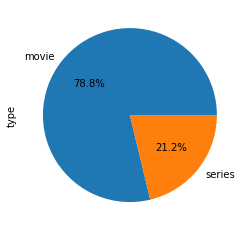

In [17]:
series_df = disney_df[disney_df['type']=="series"].reset_index(drop = True)
movie_df = disney_df[disney_df['type']=="movie"].reset_index(drop = True)
disney_df['type'].value_counts().plot.pie(autopct='%1.1f%%')

### Findings:

#### we chose to work on the part of the movies from the df because it takes up more percents than the serieses.

##### We take the numeric columns and look for outlires from the movie_df .

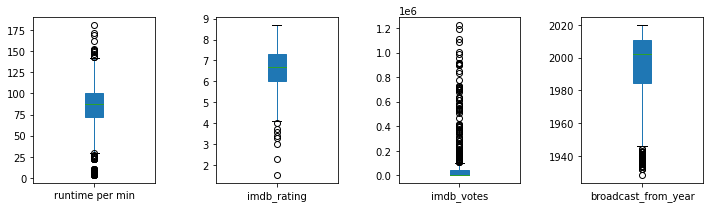

In [18]:
movienumcols = movie_df.drop(columns=["title","released_at","added_at","imdb_id","plot",'type', 'genre', 'writer', 'actors', 'director', 'language', 'country', 'awards',"metascore","rated","aired_until_year"])

movienumcols = movienumcols.select_dtypes(include=np.number)

movienumcols.plot(subplots=True, layout=(4,4), kind="box", figsize=(12,14), patch_artist=True, )
plt.subplots_adjust(wspace=0.5);

##### We can see that the boxplot of the column 'imdb_votes' does not display the full values of the column, so we will display the full values.

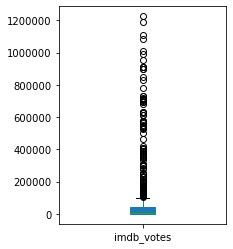

In [19]:
plt.ticklabel_format(style='plain')

movienumcols['imdb_votes'].plot(kind='box', figsize=(3,4), patch_artist=True)

### Findings: 

#### all features contain outliers (see boxplots), but all of the outliers are relevant values for future findings.

## Understand the data

##### So far we have change the NAN values and sorted the columns by type, because we chose to work on the movies from the df then the column 'aired_until_year' is irrelevant so we will drop it.

In [20]:
movie_df = movie_df.drop(columns='aired_until_year')

##### We convert the awards column to "1" for award winning movies and "0" for non award winning (NAN) movies so that we can measure in relation to this column.

In [21]:
movie_df["awards"] = movie_df["awards"].notnull().astype("int")

##### While studying our df we found that in 1985 the Disney company established the "Disney Channel" and opened up an option to broadcast and publish much more content than before, so we chose to show the movies that were only broadcast from 1985 and make our prediction about them. 
##### [link to the data source](https://d23.com/disney-history/) ( section 17 - 20 ).

In [22]:
movie_df = movie_df[movie_df["broadcast_from_year"] >= 1985].reset_index(drop = True)
# movie_df.tail(25)

### Findings: 

#### we chose to work with movies aired at Disney from 1985.

## correlations - patterns in the data

##### in order to find patterns in the data, we need to find correlations in the data

##### To understand what type of correlation, plot the density value.

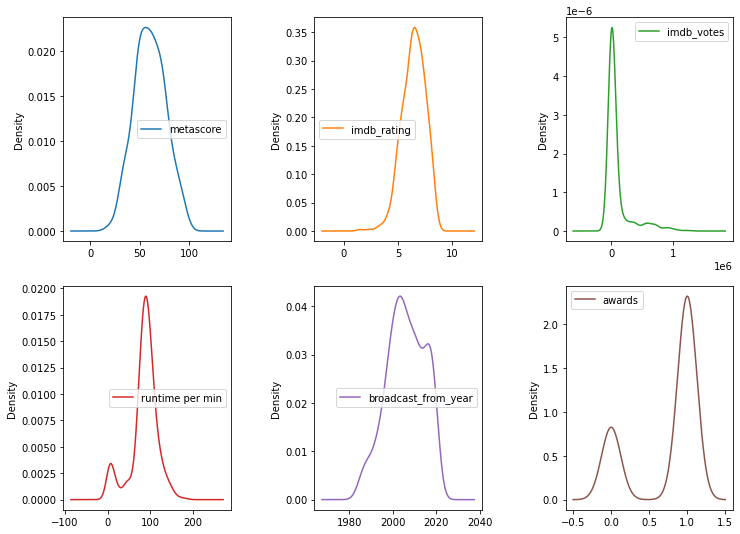

In [23]:
features = ['metascore','imdb_rating','imdb_votes','runtime per min','broadcast_from_year',"awards" ]

movie_df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(12,14))
plt.subplots_adjust(wspace = 0.5);
plt.legend("upper right")
plt.show()

##### There is normal distribution in 'metascore' 'imdb_rating' columns , so we use "pearson" method to make correlation between them  .

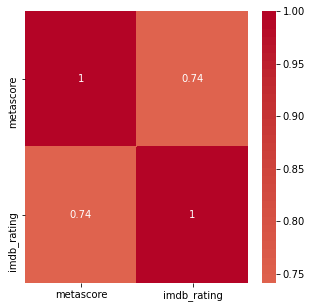

In [24]:
percor = pd.DataFrame(movie_df, columns = ['metascore','imdb_rating'])
corrs = percor.corr(method = 'pearson')

plt.figure(figsize=(5,5))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True);

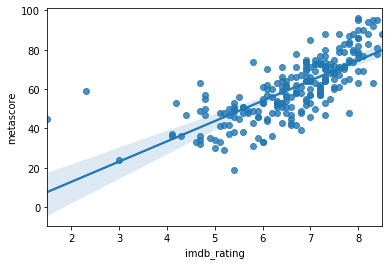

In [37]:
sns.regplot(x='imdb_rating', y="metascore", data=percor);

---
># Conclusion 1:
>
> #### As the metascore goes up, so does the rating.
>
>
---

##### now we will do a correlation between the other columns according to "kendall tau" to see if we can draw more conclusions.

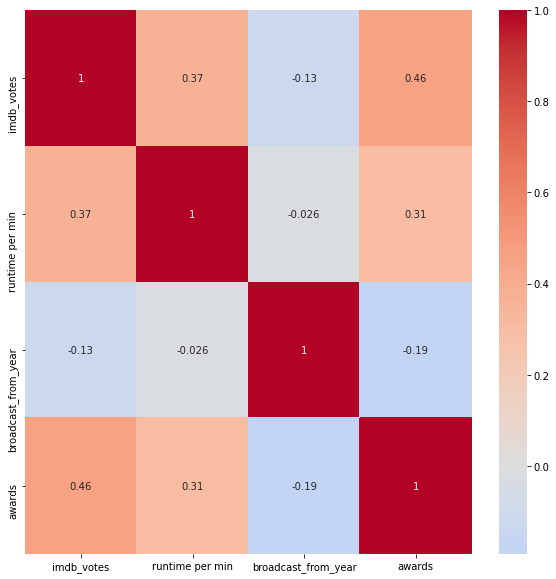

In [26]:
taucor = pd.DataFrame(movie_df, columns = ['imdb_votes','runtime per min','broadcast_from_year',"awards"])
corrs = taucor.corr(method = 'kendall')

plt.figure(figsize=(10,10))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True);

### Findings:

#### we can see from the correlation that there is a some connection between "runtime per min" ,"awards" and "imdb_votes" columns, therefore in the following steps we will try to see if there is a connection between these columns. 

## Categorical data

##### We will check the columns 'runtime per min', 'imdb_votes', 'imdb_rating' by the 'awards' column and see if there is a relationship between them, according to the movies that received an award (present by 1 ) and those that did not ( present by 0 ).

In [27]:
catcol = movie_df.pivot_table(['runtime per min','imdb_votes','imdb_rating' ],'awards')
catcol

,imdb_rating,imdb_votes,runtime per min
awards,,,
0,6.296970,3350.825758,65.325758
1,6.471968,126331.797844,92.404313


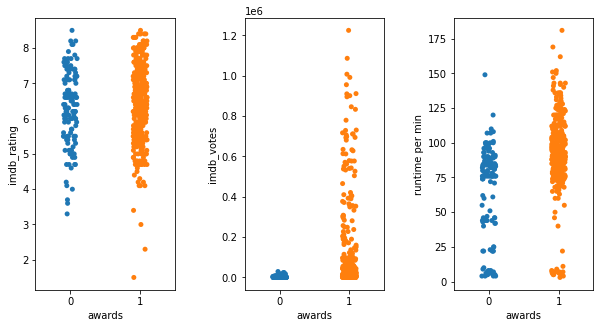

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))

sns.stripplot(ax = axes[0], x="awards" , y="imdb_rating", data=movie_df, jitter=0.1)          


sns.stripplot(ax = axes[1], x="awards", y="imdb_votes", data=movie_df, jitter=0.1)


sns.stripplot(ax = axes[2], x="awards", y="runtime per min", data=movie_df, jitter=0.1)

plt.subplots_adjust(wspace = 0.5);

plt.show()



---
>
> ##### It can be seen that the average in the "imdb_rating" column of award-winning and non-award-winning movies is almost identical, on the other hand the average in the "imdb_votes" and "runtime per min" columns is much higher in favor of award-winning movies, from this comparison we can draw 3 main conclusions:
>
># Conclusion 1 :
> #### There is no difference in the ratings of the movies that have received awards and the movies that have not received awards .
>
># Conclusion 2:
> #### Award-winning movies has more votes than non-award-winning movies.
>
># Conclusion 3:
> #### Award-winning movies are usually have long runtime than non-award-winning movies.

##### After the previous conclusions about the column "runtime per min" we would like to see for which age range the movies are the longest, so first of all we will convert the column "rated" to numerical column that we can measure.

In [29]:
movie_df['numrated'] =movie_df['rated'].astype('category').cat.codes
movie_df.head()

,imdb_id,title,plot,type,rated,released_at,added_at,runtime per min,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes,broadcast_from_year,numrated
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999-03-31,2019-11-12,97,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,1,70.0,7.3,283945,1999,3
1,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996-11-27,2019-11-12,103,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",1,49.0,5.7,97785,1996,0
2,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2003-01-21,2019-11-12,74,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,1,NaN,5.8,7434,2002,0
3,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000-11-22,2019-11-12,100,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",1,35.0,4.9,33444,2000,0
4,tt1846442,12 Dates of Christmas,"A story that follows Kate, a young woman who a...",movie,PG,2011-12-11,2019-11-12,90,"Comedy, Fantasy, Romance",James Hayman,"Aaron Mendelsohn (teleplay), Janet Brownell (t...","Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",English,USA,1,NaN,6.3,4933,2011,2


##### After we turn the "rated" column into a numeric column "numrated" we made a comparison between the average run time per minute for each age range.

In [30]:
ratedcor = movie_df.pivot_table(['runtime per min'],"numrated")
ratedcor


,runtime per min
numrated,
0,68.842640
1,69.545455
2,96.356164
3,128.594595
4,81.000000
5,90.206897
6,77.809524
7,55.000000
8,44.000000


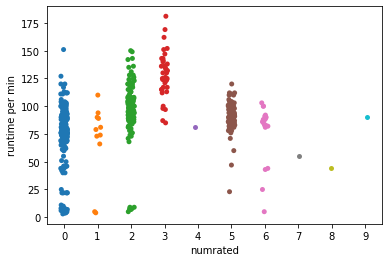

In [31]:
sns.stripplot(x="numrated" , y='runtime per min', data=movie_df)          
plt.show()

##### It can be clearly seen that the age range represented by "3" has the highest average running time per minute.
##### now we want to show the category that presnted by the "3":

In [32]:
movie_df3 = movie_df.loc[movie_df.numrated == 3]
rated = movie_df3.iloc[:1]
rated["rated"]

0    PG-13
Name: rated, dtype: object

##### The value PG-13 represent the catgory fot kids up to 13 years old and kids under 13 years old only by parental supervision. 
[link to the data source](https://en.wikipedia.org/wiki/Motion_Picture_Association#Film_rating_system)

> # Conclusion 4:
> #### According to PG-13 it can be seen that the films with the longest average running time per minute are films for children over the age of 13 and under the  age of 13 only under parental supervision.